In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [28]:
X_train.shape

(800, 2)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [30]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from MLP.nn import MLP
from MLP.grad_engine import Value

In [31]:
EPOCH = 1000
lr    = 0.1

In [32]:
clf = MLP(
    n_inputs=2,
    layers=[
        (8, "relu"),
        (16, "relu"),
        (1, "sigmoid")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [33]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy")

EPOCH 0: binary_cross_entropy = 7.748136065021811
EPOCH 1: binary_cross_entropy = 7.273894204680817
EPOCH 2: binary_cross_entropy = 6.639254014335805
EPOCH 3: binary_cross_entropy = 5.689469573952347
EPOCH 4: binary_cross_entropy = 4.281274084785748
EPOCH 5: binary_cross_entropy = 3.19269157297285
EPOCH 6: binary_cross_entropy = 2.571095554381868
EPOCH 7: binary_cross_entropy = 1.9910787503496608
EPOCH 8: binary_cross_entropy = 1.634308541711521
EPOCH 9: binary_cross_entropy = 1.3997095700522064
EPOCH 10: binary_cross_entropy = 1.2264564762887182
EPOCH 11: binary_cross_entropy = 1.1510108925696316
EPOCH 12: binary_cross_entropy = 1.1091048923126297
EPOCH 13: binary_cross_entropy = 1.084144276572886
EPOCH 14: binary_cross_entropy = 1.0626896533601546
EPOCH 15: binary_cross_entropy = 1.0415130773561323
EPOCH 16: binary_cross_entropy = 1.0204410949069913
EPOCH 17: binary_cross_entropy = 0.9993375670808575
EPOCH 18: binary_cross_entropy = 0.9782647404912734
EPOCH 19: binary_cross_entropy =

In [34]:
import numpy as np

In [35]:
probs = clf(X_test_scaled).data

# threshold at 0.5 to get 0/1 predictions
preds = (probs > 0.5).astype(int)

# compute accuracy
accuracy = (preds.flatten() == y_test.flatten()).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.925


In [36]:
import numpy as np 

def plot_decision_boundary_custom(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = (clf(grid_scaled).data > 0.5)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

In [37]:
import matplotlib.pyplot as plt

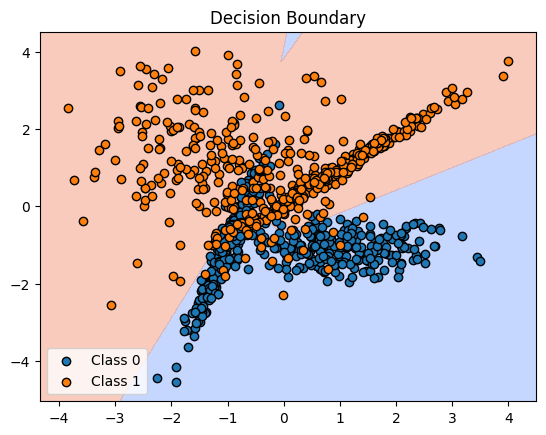

In [38]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)

In [1]:
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

In [2]:
EPOCH = 1000
lr    = 0.001

In [4]:
reg = MLP(
    n_inputs=5,
    layers=[
        (8, "relu"),
        (16, "relu"),
        (1, "linear")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [9]:
reg.fit(X_train_scaled, y_train, loss_fn="mse")

EPOCH 0: mse = 19242.414131098638
EPOCH 1: mse = 14638.411082800456
EPOCH 2: mse = 9729.865249517517
EPOCH 3: mse = 7586.795370730105
EPOCH 4: mse = 7402.563427006396
EPOCH 5: mse = 10367.133022918704
EPOCH 6: mse = 22239.00962624609
EPOCH 7: mse = 15927.135846086743
EPOCH 8: mse = 13520.82682346482
EPOCH 9: mse = 11491.246787939259
EPOCH 10: mse = 9040.063478550077
EPOCH 11: mse = 4831.796051741406
EPOCH 12: mse = 2822.771576588271
EPOCH 13: mse = 3998.3815491024247
EPOCH 14: mse = 2782.9990740624107
EPOCH 15: mse = 6055.861251607363
EPOCH 16: mse = 1463.6361505029956
EPOCH 17: mse = 2511.389974618093
EPOCH 18: mse = 1442.2787000741805
EPOCH 19: mse = 3068.2832851373814
EPOCH 20: mse = 1529.6307660925559
EPOCH 21: mse = 4300.196224849268
EPOCH 22: mse = 1789.1151836653273
EPOCH 23: mse = 5123.498168424503
EPOCH 24: mse = 1253.2042051549274
EPOCH 25: mse = 3422.109353865988
EPOCH 26: mse = 2009.2712114686096
EPOCH 27: mse = 5828.993512051151
EPOCH 28: mse = 727.6138496387905
EPOCH 29: 

In [10]:
preds = reg(X_test_scaled).data

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_test, preds)

0.9713553325372721

In [13]:
reg.parameters()

[Value(data=[[-2.92339586e+00 -2.45044093e-01 -1.33175821e+00  6.00573092e-01
   -2.90418050e-01 -2.52986419e-01  3.21558741e+00 -3.79737153e+00]
  [ 9.04744806e-01 -1.46614998e+00 -2.91970472e-01  3.91509258e+00
   -2.80564810e+00 -1.17547453e+00  1.97578407e+00 -3.45555522e+00]
  [ 2.43416521e+00 -4.74835660e-02 -2.89709272e+00  3.28617748e+00
   -2.54468739e+00  4.15556994e-01  2.23429486e-01 -9.58746301e-01]
  [ 1.01037862e-01 -2.97683555e-01 -1.13700885e-03  2.64500868e+00
   -2.08769426e+00  5.73178057e-01  9.62100576e-01 -1.83226008e+00]
  [-4.63995388e-01  5.13504422e-01 -6.45872190e-01  3.26248297e-01
   -1.37117886e-01 -3.77899189e-01  1.77239397e+00 -2.02834030e+00]]),
 Value(data=[[-5.9389311  -4.00170246 -1.74476296 -1.88397813 -0.00925922 -3.84085092
    0.36747483 -1.9032956 ]]),
 Value(data=[[-0.02013127 -3.12757969 -1.94473648  1.81667445 -2.75975879 -2.45773816
   -4.81306827 -4.50939336 -2.23728963 -2.38301023  1.54885596 -1.50163931
   -4.91340141 -1.82745964  3.510

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
X, y = load_breast_cancer(return_X_y=True)

In [21]:
X.shape

(569, 30)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [24]:
X_train.shape

(455, 30)

In [25]:
EPOCH = 5000
lr = 0.1

In [26]:
clf = MLP(
    n_inputs=30,
    layers=[
    (16, "tanh"),
    (16, "tanh"),
    (16, "tanh"),
    (1,  "sigmoid")
    ],
    epochs=2000,
    learning_rate=0.1
)

In [27]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy")

EPOCH 0: binary_cross_entropy = 9.104907440889349
EPOCH 1: binary_cross_entropy = 4.364267733916316
EPOCH 2: binary_cross_entropy = 2.3229627021698915
EPOCH 3: binary_cross_entropy = 2.060229273468735
EPOCH 4: binary_cross_entropy = 1.8972678946236377
EPOCH 5: binary_cross_entropy = 1.7600615768661645
EPOCH 6: binary_cross_entropy = 1.6568054055550772
EPOCH 7: binary_cross_entropy = 1.5882866043708899
EPOCH 8: binary_cross_entropy = 1.531764354534215
EPOCH 9: binary_cross_entropy = 1.489584640609265
EPOCH 10: binary_cross_entropy = 1.452389421970222
EPOCH 11: binary_cross_entropy = 1.409965825033447
EPOCH 12: binary_cross_entropy = 1.3655411889105178
EPOCH 13: binary_cross_entropy = 1.2920934705982021
EPOCH 14: binary_cross_entropy = 1.2484834484192082
EPOCH 15: binary_cross_entropy = 1.1903208912512238
EPOCH 16: binary_cross_entropy = 1.1346510175135496
EPOCH 17: binary_cross_entropy = 1.09803965642157
EPOCH 18: binary_cross_entropy = 1.0523723456972383
EPOCH 19: binary_cross_entropy 

In [28]:
import numpy as np
preds = np.array([1 if clf(x).data > 0.5 else 0 for x in X_test_scaled])
accuracy = (preds == y_test).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.904
